## **Aeration efficiency of Montanna Flume using neural networks**

> ## **Data Exploration**

In [1]:
import pandas as pd 

In [2]:
data = pd.read_excel("full data paper 2 (1).xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Flume No.  90 non-null     object 
 1   Fr         90 non-null     float64
 2   Re         90 non-null     float64
 3   A/W        90 non-null     float64
 4   D/W        90 non-null     float64
 5   E20        90 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.3+ KB


In [4]:
data.shape

(90, 6)

In [5]:
data.head()

,Flume No.,Fr,Re,A/W,D/W,E20
0,MF1,0.149183,40650.406504,14.28,6.59,0.08
1,MF1,0.153186,89430.894309,14.28,6.59,0.08
2,MF1,0.159066,146341.463415,14.28,6.59,0.13
3,MF1,0.161214,195121.951220,14.28,6.59,0.15
4,MF1,0.160795,252032.520325,14.28,6.59,0.24


In [6]:
data.tail(10)

,Flume No.,Fr,Re,A/W,D/W,E20
80,MMF6,0.335112,186528.497409,3.57,2.42,0.23
81,MMF6,0.337572,207253.886010,3.57,2.42,0.25
82,MMF6,0.338844,222797.927461,3.57,2.42,0.28
83,MMF6,0.330945,227979.274611,3.57,2.42,0.32
84,MMF6,0.331321,238341.968912,3.57,2.42,0.33
85,MMF6,0.328712,243523.316062,3.57,2.42,0.34
86,MMF6,0.330875,248704.663212,3.57,2.42,0.33
87,MMF6,0.330004,253886.010363,3.57,2.42,0.34
88,MMF6,0.331430,259067.357513,3.57,2.42,0.38
89,MMF6,0.333496,269430.051813,3.57,2.42,0.43


In [7]:
data.describe()

,Fr,Re,A/W,D/W,E20
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.251057,220660.012259,7.121667,3.808333,0.269333
std,0.054532,97245.665067,3.486765,1.354262,0.126507
min,0.149183,25906.735751,3.570000,2.420000,0.010000
25%,0.240600,154805.121943,5.510000,3.190000,0.180000
50%,0.250070,244444.444444,5.605000,3.225000,0.315000
75%,0.282605,277777.777778,8.160000,4.200000,0.367500
max,0.343488,422764.227642,14.280000,6.590000,0.500000


In [8]:
data['Flume No.'].value_counts()

MF1     15
MF2     15
MMF3    15
MMF4    15
MMF5    15
MMF6    15
Name: Flume No., dtype: int64

##### `Deleting Flume no. column as it has no significance`

In [9]:
del data['Flume No.']

In [10]:
data.head()

,Fr,Re,A/W,D/W,E20
0,0.149183,40650.406504,14.28,6.59,0.08
1,0.153186,89430.894309,14.28,6.59,0.08
2,0.159066,146341.463415,14.28,6.59,0.13
3,0.161214,195121.951220,14.28,6.59,0.15
4,0.160795,252032.520325,14.28,6.59,0.24


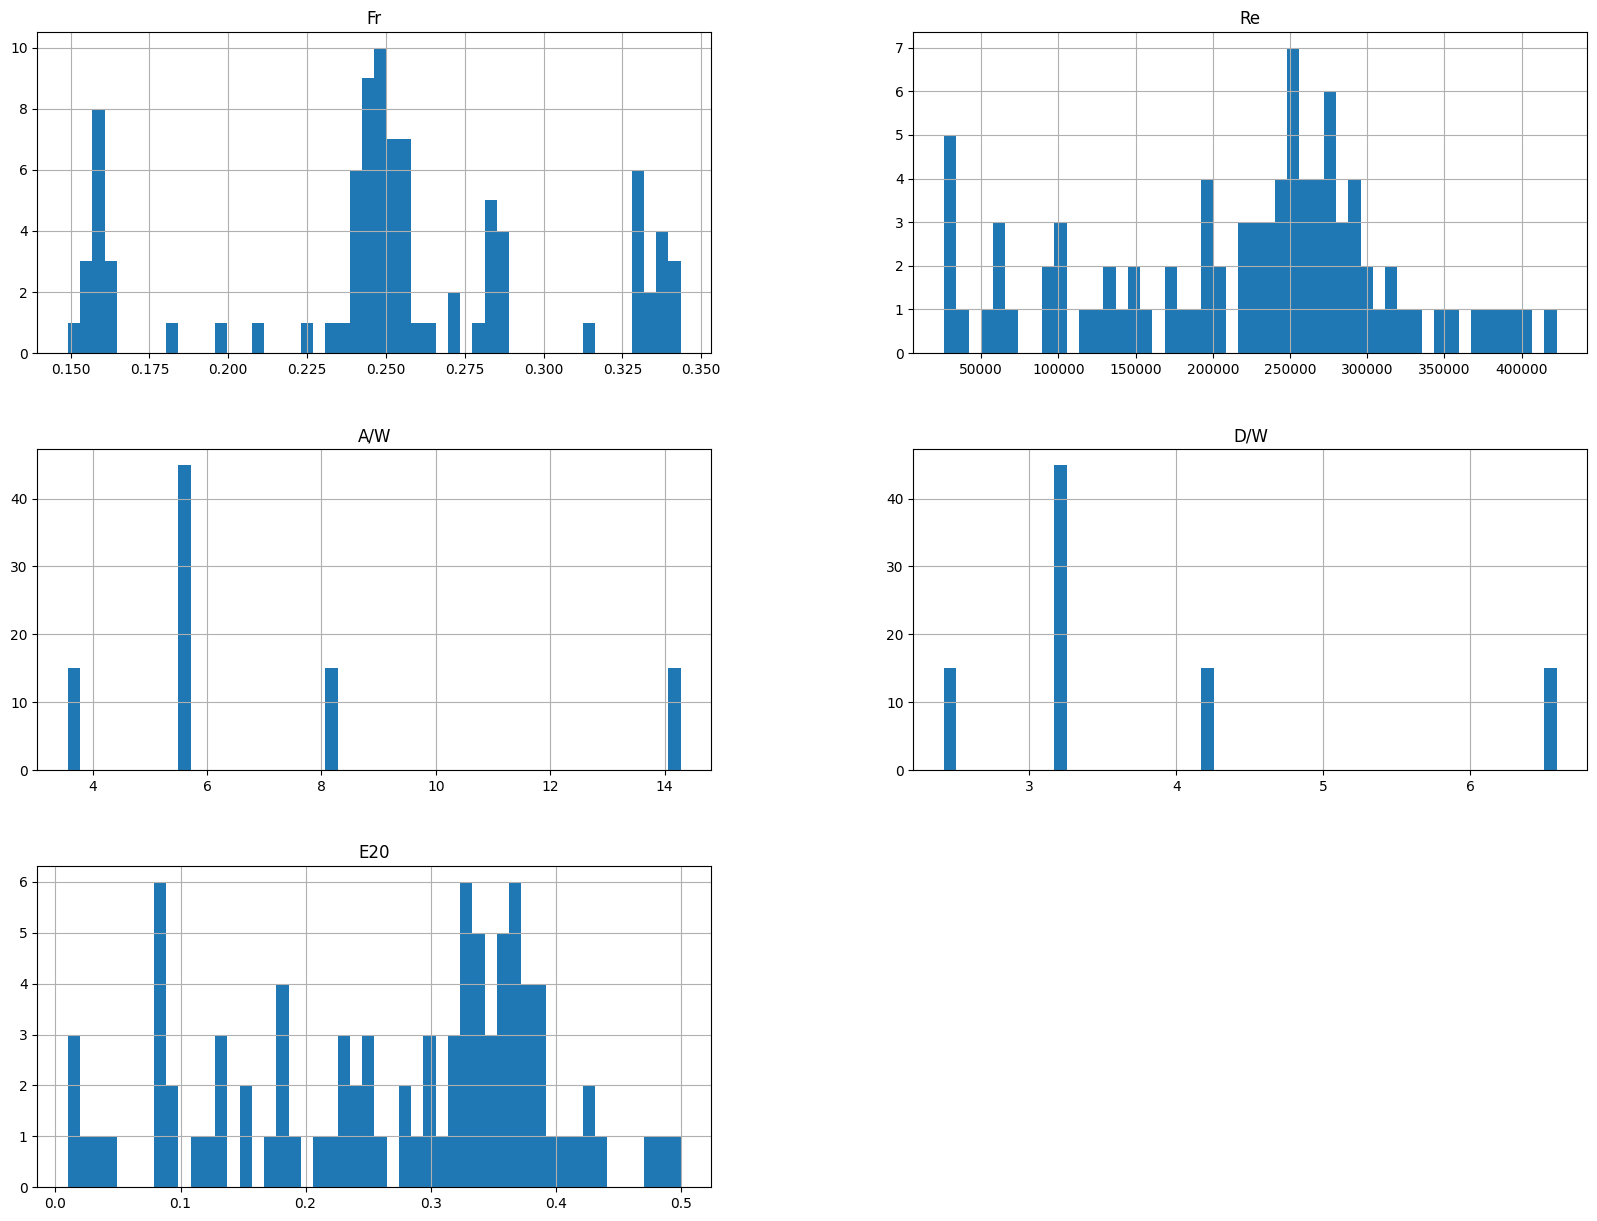

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize = (20,15))
plt.show()

> ## **Train-Test Splitting**

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data , test_size= 0.2 , random_state= 42)
print (f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 72
Rows in test set : 18


`Reason to use Stratified Shuffle Spilt`
  - For the model to train in all 6 models so as to give better test results
  - The same way D/W attribute also gets equally distributed in train and test data

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1 ,test_size= 0.2 , random_state= 42)
for train_index, test_index in split.split(data , data['A/W']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
strat_train_set.describe()

,Fr,Re,A/W,D/W,E20
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.250772,217347.085608,7.121667,3.808333,0.266806
std,0.054402,99237.544931,3.491673,1.356168,0.131286
min,0.149183,25906.735751,3.570000,2.420000,0.010000
25%,0.240989,144041.811847,5.510000,3.190000,0.165000
50%,0.250216,243983.880253,5.605000,3.225000,0.320000
75%,0.282136,277777.777778,8.160000,4.200000,0.370000
max,0.343488,406504.065041,14.280000,6.590000,0.500000


In [15]:
strat_train_set['A/W'].value_counts()

3.57     12
14.28    12
5.51     12
5.64     12
5.57     12
8.16     12
Name: A/W, dtype: int64

In [16]:
strat_test_set['A/W'].value_counts()

14.28    3
3.57     3
5.57     3
5.64     3
8.16     3
5.51     3
Name: A/W, dtype: int64

In [17]:
strat_test_set.describe()

,Fr,Re,A/W,D/W,E20
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.252199,233911.718861,7.121667,3.808333,0.279444
std,0.056621,90255.336303,3.567864,1.385761,0.108002
min,0.157931,70063.694268,3.570000,2.420000,0.080000
25%,0.236635,179166.666667,5.510000,3.190000,0.197500
50%,0.246361,245079.365079,5.605000,3.225000,0.280000
75%,0.283017,286178.861789,8.160000,4.200000,0.340000
max,0.337741,422764.227642,14.280000,6.590000,0.480000


> ## **Looking for Correletion**

In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix['Fr'].sort_values(ascending=False)

Fr     1.000000
E20    0.014326
Re    -0.223844
A/W   -0.892804
D/W   -0.894383
Name: Fr, dtype: float64

In [20]:
corr_matrix['E20'].sort_values(ascending=False)

E20    1.000000
Re     0.912209
A/W    0.090529
D/W    0.090177
Fr     0.014326
Name: E20, dtype: float64

array([[<Axes: xlabel='Fr', ylabel='Fr'>,
        <Axes: xlabel='Re', ylabel='Fr'>,
        <Axes: xlabel='A/W', ylabel='Fr'>,
        <Axes: xlabel='D/W', ylabel='Fr'>,
        <Axes: xlabel='E20', ylabel='Fr'>],
       [<Axes: xlabel='Fr', ylabel='Re'>,
        <Axes: xlabel='Re', ylabel='Re'>,
        <Axes: xlabel='A/W', ylabel='Re'>,
        <Axes: xlabel='D/W', ylabel='Re'>,
        <Axes: xlabel='E20', ylabel='Re'>],
       [<Axes: xlabel='Fr', ylabel='A/W'>,
        <Axes: xlabel='Re', ylabel='A/W'>,
        <Axes: xlabel='A/W', ylabel='A/W'>,
        <Axes: xlabel='D/W', ylabel='A/W'>,
        <Axes: xlabel='E20', ylabel='A/W'>],
       [<Axes: xlabel='Fr', ylabel='D/W'>,
        <Axes: xlabel='Re', ylabel='D/W'>,
        <Axes: xlabel='A/W', ylabel='D/W'>,
        <Axes: xlabel='D/W', ylabel='D/W'>,
        <Axes: xlabel='E20', ylabel='D/W'>],
       [<Axes: xlabel='Fr', ylabel='E20'>,
        <Axes: xlabel='Re', ylabel='E20'>,
        <Axes: xlabel='A/W', ylabel='E20'>,
    

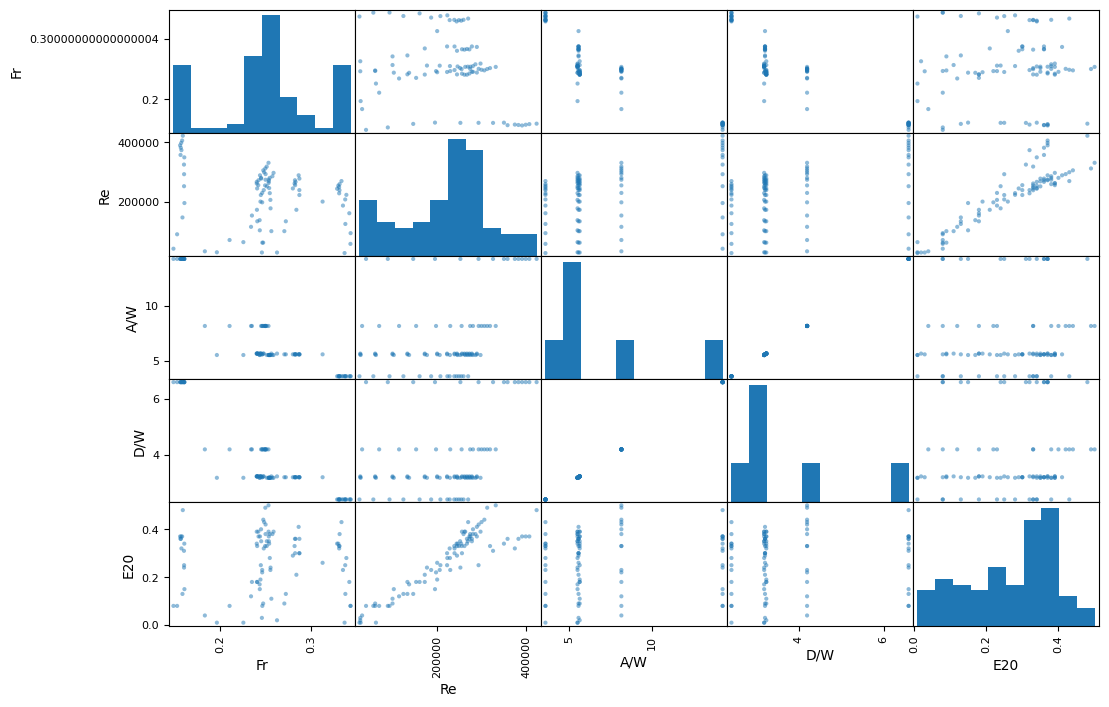

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix (data, figsize= (12,8))

> ## **Trying out Attributions**

<Axes: xlabel='E20', ylabel='Re'>

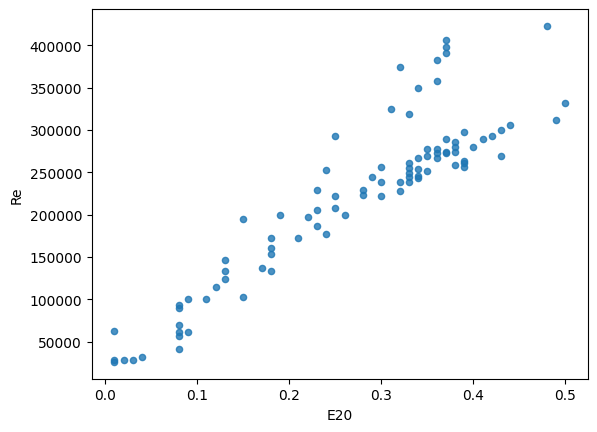

In [22]:
data.plot(kind= "scatter", x= "E20", y = "Re", alpha = 0.8)

> ## **Trying out Attributions**

In [23]:
data["Ratio"] =  data["D/W"]/data["Re"]

In [24]:
data["Ratio"]

0     0.000162
1     0.000074
2     0.000045
3     0.000034
4     0.000026
        ...   
85    0.000010
86    0.000010
87    0.000010
88    0.000009
89    0.000009
Name: Ratio, Length: 90, dtype: float64

In [25]:
data.head()

,Fr,Re,A/W,D/W,E20,Ratio
0,0.149183,40650.406504,14.28,6.59,0.08,0.000162
1,0.153186,89430.894309,14.28,6.59,0.08,0.000074
2,0.159066,146341.463415,14.28,6.59,0.13,0.000045
3,0.161214,195121.951220,14.28,6.59,0.15,0.000034
4,0.160795,252032.520325,14.28,6.59,0.24,0.000026


In [26]:
corr_matrix = data.corr()
corr_matrix['E20'].sort_values(ascending=False)

E20      1.000000
Re       0.912209
A/W      0.090529
D/W      0.090177
Fr       0.014326
Ratio   -0.713602
Name: E20, dtype: float64

<Axes: xlabel='E20', ylabel='Ratio'>

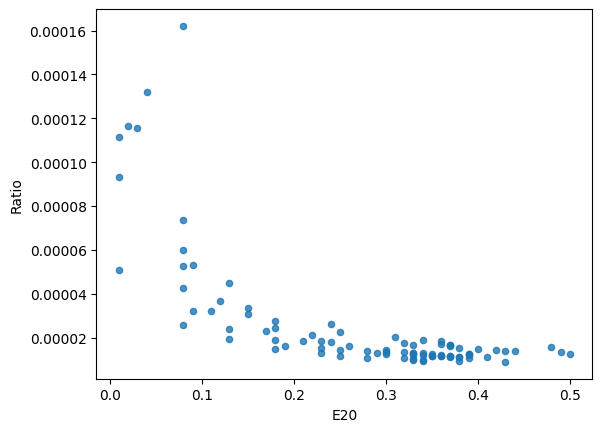

In [27]:
data.plot(kind= "scatter", x= "E20", y = "Ratio", alpha = 0.8)

In [28]:
data = strat_train_set.drop("E20" , axis=1)

data_label = strat_train_set["E20"].copy()

> ## **Creating a pipeline**

- **Feature Scaling** -`Using Standardization to standardize features so they work well on with models to be used.`

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

In [30]:
data = my_pipeline.fit_transform(data)

In [31]:
data # numpy array because regression take numpy array not pandadataframe 

array([[ 1.48407216,  0.10789064, -1.02432025, -1.03090191],
       [ 1.48277537,  0.31820249, -1.02432025, -1.03090191],
       [-1.6577826 , -0.22553059,  2.06450281,  2.06551655],
       [ 0.01503622,  0.34584347, -0.46481355, -0.45914119],
       [-0.17838953, -0.85253348, -0.42732084, -0.42201387],
       [-0.13093507, -0.81387616, -0.46481355, -0.45914119],
       [-1.66684392,  1.09447549,  2.06450281,  2.06551655],
       [ 0.07537162,  0.11389955, -0.46481355, -0.45914119],
       [ 0.66136669,  0.7259738 , -0.44750922, -0.44429026],
       [-1.24303309, -1.88236944,  0.29946106,  0.29083067],
       [ 1.49303595,  0.42335841, -1.02432025, -1.03090191],
       [-1.66015958,  1.34197664,  2.06450281,  2.06551655],
       [ 0.12884933,  0.69375936, -0.46481355, -0.45914119],
       [-1.80637687, -1.29803554,  2.06450281,  2.06551655],
       [ 0.05669555,  0.51980142, -0.46481355, -0.45914119],
       [ 0.22224623, -1.92366342, -0.42732084, -0.42201387],
       [ 1.68998921, -0.

> ## **Selecting Models**

- ## **Multi Linear Regression**

In [32]:
print(data.shape)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data ,data_label)

(72, 4)


LinearRegression()

In [33]:
data = pd.DataFrame(data)
data_label = pd.DataFrame(data_label)
model.predict(data)

array([ 0.31948051,  0.3474207 ,  0.15638002,  0.32475881,  0.16967433,
        0.1747842 ,  0.33176914,  0.29236922,  0.36338876,  0.05544644,
        0.36109902,  0.36443037,  0.36787831,  0.01804776,  0.34672638,
        0.01683414,  0.2232799 ,  0.35446112,  0.34837754,  0.06923253,
        0.25771714,  0.30828463,  0.11715132,  0.41011269,  0.27322254,
        0.29569033,  0.36168512,  0.42145585,  0.37764668,  0.16089984,
        0.32288935,  0.04446513,  0.20753126,  0.08359614,  0.35939309,
        0.29016488,  0.22270868,  0.38344654,  0.03177892,  0.34151556,
        0.37407912,  0.23321411,  0.09176337,  0.32819828,  0.37742352,
        0.36203213,  0.34201297,  0.26160657,  0.11682775,  0.40776646,
        0.30669703,  0.14185724,  0.33919253,  0.24728249,  0.30859352,
        0.43180305,  0.08313666,  0.333698  , -0.04565026,  0.44223231,
        0.37402889,  0.13188458,  0.07642466,  0.33324731,  0.35599488,
        0.05181789,  0.34802115,  0.34948905,  0.39995136,  0.34

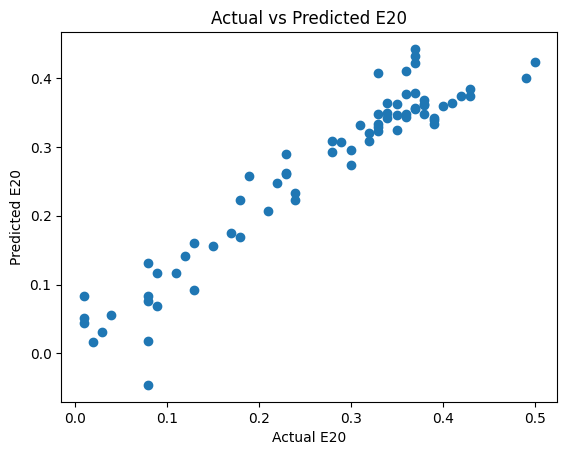

In [34]:
data_pred = model.predict(data)
plt.scatter(data_label, data_pred)
# Plot our model prediction
#plt.plot(data,data_pred , c='b',label='Our Prediction')
# plt.scatter(np.arange(len(data_label)), data_label, color='blue', label='Actual')
# plt.scatter(np.arange(len(data_pred)), data_pred, color='red', label='Predicted')

# Plot the data points
#plt.scatter(data, data_label, marker='x', c='r',label='Actual Values')
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20')
plt.show()

In [35]:
import numpy as np

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data_label' contains the actual values and 'predictions' contains the predicted values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data_label, data_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data_label, data_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(data_label, data_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

#These metrics provide different perspectives on the accuracy of your regression model. 
#        -Lower values for MAE, MSE, and RMSE indicate better performance,
#        -while higher values for R-squared indicate better fit of the model to the data.

Mean Absolute Error (MAE): 0.02964851895124255
Mean Squared Error (MSE): 0.0015180820283669358
Root Mean Squared Error (RMSE): 0.03896257214772834
R-squared (R2): 0.9106839293227051


In [37]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(strat_train_set, model.coef_))

Intercept:  0.2668055555555537
Coefficients:


[('Fr', -0.026747224614869298),
 ('Re', 0.13268632881708706),
 ('A/W', 2.5915476059394624),
 ('D/W', -2.6507166522062224)]

- ### **Testing the model on test data**

In [38]:
data_test = strat_test_set.drop("E20", axis=1)
Y_test = strat_test_set["E20"].copy()
data_test_prepared = my_pipeline.transform(data_test)
final_pred = model.predict(data_test_prepared)

In [39]:
mlr_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': final_pred})
mlr_diff.head()

,Actual value,Predicted value
14,0.48,0.463764
81,0.25,0.288294
54,0.30,0.320408
66,0.25,0.287439
16,0.08,0.093477


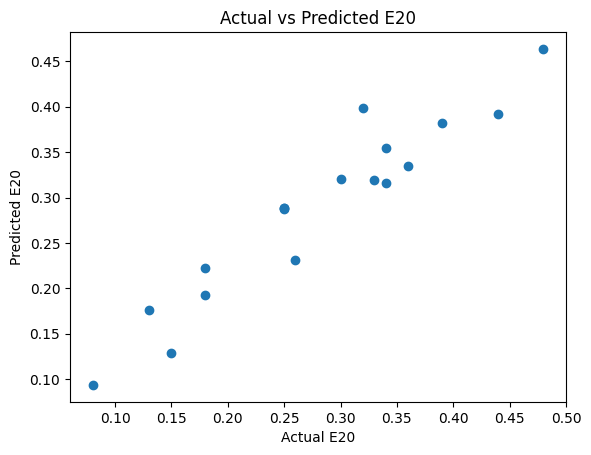

In [40]:
plt.scatter(Y_test, final_pred)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20')
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, final_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, final_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(Y_test, final_pred)*100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.029135147519763333
Mean Squared Error (MSE): 0.0011482811936200823
Root Mean Squared Error (RMSE): 0.03388629802176807
R-squared (R2): 89.57658065354813


- ## **Decision Tree**

In [42]:
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
model_dt =  DecisionTreeRegressor()

In [43]:
model_dt.fit(data ,data_label)
data_pred_dt = model_dt.predict(data)

In [44]:
data.head()

,0,1,2,3
0,1.484072,0.107891,-1.024320,-1.030902
1,1.482775,0.318202,-1.024320,-1.030902
2,-1.657783,-0.225531,2.064503,2.065517
3,0.015036,0.345843,-0.464814,-0.459141
4,-0.178390,-0.852533,-0.427321,-0.422014


In [45]:
data_pred_dt

array([0.32, 0.33, 0.15, 0.35, 0.18, 0.17, 0.31, 0.28, 0.41, 0.04, 0.38,
       0.34, 0.38, 0.08, 0.35, 0.02, 0.18, 0.37, 0.38, 0.09, 0.19, 0.32,
       0.11, 0.36, 0.3 , 0.3 , 0.38, 0.37, 0.37, 0.13, 0.33, 0.01, 0.21,
       0.01, 0.4 , 0.23, 0.24, 0.43, 0.03, 0.34, 0.42, 0.24, 0.13, 0.33,
       0.36, 0.35, 0.39, 0.23, 0.09, 0.33, 0.29, 0.12, 0.39, 0.22, 0.28,
       0.37, 0.08, 0.39, 0.08, 0.37, 0.43, 0.08, 0.08, 0.33, 0.37, 0.01,
       0.36, 0.34, 0.49, 0.36, 0.23, 0.5 ])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(data_label, data_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(data_label, data_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2)
r2_dt = r2_score(data_label, data_pred_dt)

print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)

Mean Absolute Error (MAE): 2.3129646346357427e-18
Mean Squared Error (MSE): 1.2839532962581572e-34
Root Mean Squared Error (RMSE): 1.1331166295920986e-17
R-squared (R2): 1.0


- ### **Testing the model on Test data**

In [47]:
final_pred_dt = model_dt.predict(data_test_prepared)

In [48]:
dt_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': final_pred_dt})
dt_diff.head()

,Actual value,Predicted value
14,0.48,0.37
81,0.25,0.23
54,0.30,0.36
66,0.25,0.23
16,0.08,0.08


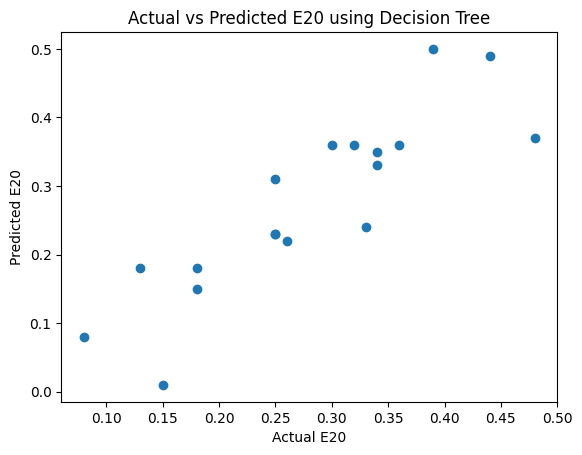

In [49]:
plt.scatter(Y_test, final_pred_dt)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using Decision Tree')
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(Y_test, final_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(Y_test, final_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse)

# Calculate R-squared (R2)
r2_dt = r2_score(Y_test, final_pred_dt)*100

print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R2):", r2_dt)

Mean Absolute Error (MAE): 0.04666666666666666
Mean Squared Error (MSE): 0.003844444444444445
Root Mean Squared Error (RMSE): 0.03388629802176807
R-squared (R2): 65.10240103101448


- ## **FNN(FeedForward Neural Network)**

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model_fnn = Sequential([
    Dense(64, activation='relu', input_shape=(data.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional layer
    Dense(8, activation='relu'),   # Additional layer
    Dense(1)  # Output layer with one neuron for regression
])

c:\Users\Alekhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Access and print the weights for each layer
for layer in model_fnn.layers:
    print("Layer Name:", layer.name)
    weights, biases = layer.get_weights()
    print("Weights Shape:", weights.shape)
    print("Biases Shape:", biases.shape)
    print("Weights:", weights)
    print("Biases:", biases)
    print()

Layer Name: dense
Weights Shape: (4, 64)
Biases Shape: (64,)
Weights: [[-0.00498423  0.03023314  0.07747203  0.24516815 -0.06160489 -0.16027762
  -0.04744992 -0.04714255 -0.25754756 -0.02804923  0.20798194  0.23778582
   0.07258886 -0.26560003 -0.24718404  0.01249719  0.26835722 -0.00928235
  -0.19615555 -0.03052655 -0.27511013  0.02139613  0.04882193 -0.17274281
  -0.08095258 -0.05438881  0.18961993  0.23427927  0.10076466  0.03238249
   0.24820906 -0.05301431  0.03015277 -0.1893748   0.26978672 -0.08628659
  -0.26553103 -0.20582055  0.00154299  0.11435476 -0.19811234  0.29554015
  -0.0396941  -0.15707539  0.18451953 -0.20401454  0.04891238  0.2749346
   0.0942426   0.03396031  0.27818608  0.02513808  0.29661715  0.23675674
   0.18370935  0.10596764 -0.12401719  0.06724441  0.21533787  0.07849029
   0.16950572 -0.14159848  0.14654821 -0.2611919 ]
 [-0.23254028  0.11519364  0.13598534  0.13017493 -0.00500938 -0.16487603
   0.24654424  0.02004734  0.16463798  0.0661993  -0.21973643  0.2

In [54]:
# Compile the model
model_fnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_fnn.fit(data, data_label, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - loss: 0.0451 - mae: 0.1847 - val_loss: 0.0568 - val_mae: 0.2065
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0333 - mae: 0.1485 - val_loss: 0.0424 - val_mae: 0.1694
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0250 - mae: 0.1283 - val_loss: 0.0344 - val_mae: 0.1565
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0197 - mae: 0.1189 - val_loss: 0.0279 - val_mae: 0.1408
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0159 - mae: 0.1062 - val_loss: 0.0216 - val_mae: 0.1220
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0128 - mae: 0.0928 - val_loss: 0.0161 - val_mae: 0.1033
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0102 - mae: 0.0796 - val_loss: 0.0121 - val_mae: 0.0872
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0076 - mae: 0.0676 - val_loss: 0.0089 - val_mae: 0.0709
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0061 - mae: 0.0586 -

In [55]:
model_fnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,221 (36.02 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,148 (24.02 KB)

In [56]:
for layer in model_fnn.layers:
    print("Layer Name:", layer.name)
    weights, biases = layer.get_weights()
    print("Weights_after Shape:", weights.shape)
    print("Biases_after Shape:", biases.shape)
    print("Weights_after:", weights)
    print("Biases_after:", biases)
    print()

Layer Name: dense
Weights_after Shape: (4, 64)
Biases_after Shape: (64,)
Weights_after: [[-0.01842529  0.01909959  0.06579453  0.2504018  -0.0569232  -0.16172476
  -0.05993597 -0.02216017 -0.2522312  -0.02434622  0.21932186  0.23410897
   0.08224405 -0.29018858 -0.23037237  0.00584908  0.24937296  0.0086506
  -0.18349774 -0.0422103  -0.26298538  0.01709348  0.05743099 -0.16987309
  -0.08137506 -0.06737788  0.20758697  0.23113967  0.11240641  0.02288545
   0.2264785  -0.05656676  0.02112075 -0.16874945  0.27947783 -0.10420203
  -0.23708808 -0.17216583  0.00051813  0.11376265 -0.17425784  0.28671244
  -0.0596637  -0.14138435  0.18107703 -0.18792601  0.0382966   0.26295504
   0.10158005  0.03020065  0.28338903  0.02076363  0.30682784  0.2142034
   0.17869382  0.10348495 -0.11653244  0.06163003  0.20725685  0.08367957
   0.15906487 -0.14951114  0.14182265 -0.2826011 ]
 [-0.23160456  0.131821    0.14522997  0.1444041  -0.02240453 -0.15730834
   0.26454273  0.03045476  0.17721075  0.05472793

In [57]:
loss_fnn, mae_fnn = model_fnn.evaluate(data_test_prepared, Y_test)
# Make predictions
pred_fnn = model_fnn.predict(data_test_prepared)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0011 - mae: 0.0272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


In [58]:
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

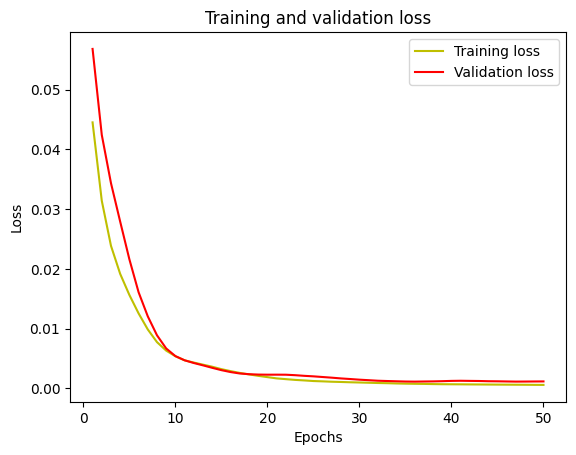

In [59]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
fnn_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': pred_fnn.flatten()})
fnn_diff.head()

,Actual value,Predicted value
0,0.48,0.406399
1,0.25,0.256011
2,0.30,0.328538
3,0.25,0.285306
4,0.08,0.079247


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_fnn = mean_absolute_error(Y_test, pred_fnn)

# Calculate Mean Squared Error (MSE)
mse_fnn = mean_squared_error(Y_test, pred_fnn)

# Calculate Root Mean Squared Error (RMSE)
rmse_fnn = np.sqrt(mse_fnn)

# Calculate R-squared (R2)
r2_fnn = r2_score(Y_test, pred_fnn)

print("Mean Absolute Error (MAE):", mae_fnn)
print("Mean Squared Error (MSE):", mse_fnn)
print("Root Mean Squared Error (RMSE):", rmse_fnn)
print("R-squared (R2):", r2_fnn)

Mean Absolute Error (MAE): 0.027158903529246645
Mean Squared Error (MSE): 0.0010981880880554047
Root Mean Squared Error (RMSE): 0.03313892104543244
R-squared (R2): 0.9003129631776676


- ## **ANN(Artificial Neural Network)** 

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(data.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with one neuron for regression
])


c:\Users\Alekhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
def print_weights(model):
    for layer in model.layers:
        weights = layer.get_weights()
        if len(weights) > 0:
            print(f"Weights of {layer.name}: {weights[0]}")

# Print initial weights
print("Initial weights:")
print_weights(model_ann)



Initial weights:
Weights of dense_5: [[-0.09842062  0.14847803 -0.16217668 -0.02951178 -0.13758329  0.24927652
   0.20476961  0.09502405  0.10129565  0.25191295 -0.16315536 -0.14067002
  -0.28369164  0.23715055 -0.02527726  0.21923912 -0.17667052  0.1590265
  -0.10651602  0.17329359 -0.1842097   0.10908681 -0.1731877   0.06015497
   0.17484555  0.10009894 -0.09067515  0.23837781  0.11975428  0.05113691
   0.03190905 -0.25094363  0.1214408   0.16942266  0.05711618 -0.2601019
   0.20225662 -0.05813126 -0.2720744  -0.19918619  0.22421044 -0.29499856
   0.16191459 -0.08756399 -0.01093638 -0.20474273 -0.25134626  0.23796272
  -0.01006103 -0.12260623 -0.09796992  0.26764387 -0.00828138  0.2485739
   0.01785535  0.10169637 -0.02889845 -0.13106047  0.1389203  -0.04217467
  -0.21440369 -0.15369128 -0.27032873  0.03004625]
 [ 0.18569425 -0.01219118  0.11118522 -0.2303119   0.02915165  0.22388226
  -0.05942699 -0.23961832  0.21844774 -0.17225577 -0.22325204 -0.00881961
   0.15763593 -0.03444991  

In [65]:
model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model_ann.fit(data, data_label, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - loss: 0.0820 - mae: 0.2503 - val_loss: 0.0731 - val_mae: 0.2106
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0781 - mae: 0.2416 - val_loss: 0.0634 - val_mae: 0.1950
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0735 - mae: 0.2337 - val_loss: 0.0552 - val_mae: 0.1816
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0665 - mae: 0.2182 - val_loss: 0.0481 - val_mae: 0.1687
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0567 - mae: 0.1997 - val_loss: 0.0422 - val_mae: 0.1605
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0437 - mae: 0.1723 - val_loss: 0.0373 - val_mae: 0.1527
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0437 - mae: 0.1731 - val_loss: 0.0330 - val_mae: 0.1461
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0377 - mae: 0.1620 - val_loss: 0.0291 - val_mae: 0.1390
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0336 - mae: 0.1509 -

In [66]:
print("Weights after training:")
print_weights(model_ann)

Weights after training:
Weights of dense_5: [[-0.12477124  0.13517566 -0.16446109 -0.01528811 -0.15904875  0.23309663
   0.2065841   0.10026427  0.0831723   0.23462433 -0.14116389 -0.15727316
  -0.2564671   0.24878407 -0.03183256  0.23325913 -0.19570443  0.18493696
  -0.10449902  0.19426784 -0.23688798  0.12914817 -0.21347295  0.06714153
   0.16482134  0.08988447 -0.09504078  0.20734152  0.14509496  0.04219659
   0.00046951 -0.28105685  0.09182098  0.18034452  0.02823447 -0.25662547
   0.19348827 -0.0461035  -0.25842443 -0.17535715  0.23536986 -0.28089052
   0.1744459  -0.1033247  -0.03287092 -0.22333111 -0.26117358  0.22687371
   0.00270241 -0.12745875 -0.11364288  0.23259738 -0.01674984  0.26225218
   0.02226639  0.07244977 -0.03134347 -0.13562904  0.13670641 -0.01947365
  -0.19012561 -0.17606288 -0.25401205  0.04347996]
 [ 0.1654886  -0.03805944  0.04313319 -0.27771825 -0.03069353  0.22965126
  -0.11132917 -0.29087523  0.23747411 -0.22771858 -0.2873403  -0.06008047
   0.15225017 -0.

In [67]:
test_loss_ann = model_ann.evaluate(data_test_prepared, Y_test)
print("Test Loss:", test_loss_ann)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0017 - mae: 0.0302
Test Loss: [0.0017221351154148579, 0.030178464949131012]


In [68]:
# Make predictions
pred_ann = model_ann.predict(data_test_prepared)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [69]:
ann_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': pred_ann.flatten()})
ann_diff.head()

,Actual value,Predicted value
0,0.48,0.361913
1,0.25,0.234688
2,0.30,0.365862
3,0.25,0.314149
4,0.08,0.078657


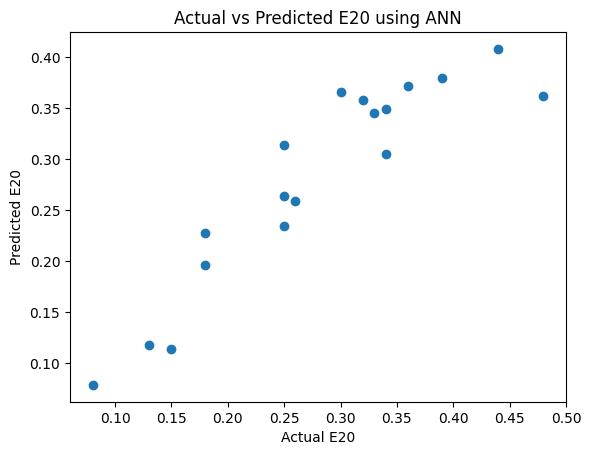

In [70]:
plt.scatter(Y_test, pred_ann)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using ANN')
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_ann = mean_absolute_error(Y_test, pred_ann)

# Calculate Mean Squared Error (MSE)
mse_ann = mean_squared_error(Y_test, pred_ann)

# Calculate Root Mean Squared Error (RMSE)
rmse_ann = np.sqrt(mse_ann)

# Calculate R-squared (R2)
r2_ann = r2_score(Y_test, pred_ann)

print("Mean Absolute Error (MAE):", mae_ann)
print("Mean Squared Error (MSE):", mse_ann)
print("Root Mean Squared Error (RMSE):", rmse_ann)
print("R-squared (R2):", r2_ann)

Mean Absolute Error (MAE): 0.03017847003208267
Mean Squared Error (MSE): 0.001722135423664063
Root Mean Squared Error (RMSE): 0.04149861953925773
R-squared (R2): 0.8436747044890717


- ## **MNLR(Multi Non-Linear Regression)**


In [72]:
x_train = data 
y_train = data_label
x_test = data_test_prepared

In [73]:
model_mnlr = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Output layer with one neuron for regression
])

# Compile the model
model_mnlr.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_mnlr.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_mnlr = model_mnlr.evaluate(x_test, Y_test)
print("Test Loss:", test_loss_mnlr)

c:\Users\Alekhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 0.1068 - mae: 0.2996 - val_loss: 0.0897 - val_mae: 0.2505
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0978 - mae: 0.2849 - val_loss: 0.0837 - val_mae: 0.2392
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0936 - mae: 0.2766 - val_loss: 0.0780 - val_mae: 0.2281
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0872 - mae: 0.2649 - val_loss: 0.0727 - val_mae: 0.2172
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0847 - mae: 0.2601 - val_loss: 0.0677 - val_mae: 0.2065
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0759 - mae: 0.2452 - val_loss: 0.0631 - val_mae: 0.1965
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0700 - mae: 0.2321 - val_loss: 0.0588 - val_mae: 0.1876
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0687 - mae: 0.2304 - val_loss: 0.0549 - val_mae: 0.1796
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0607 - mae:

In [74]:
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

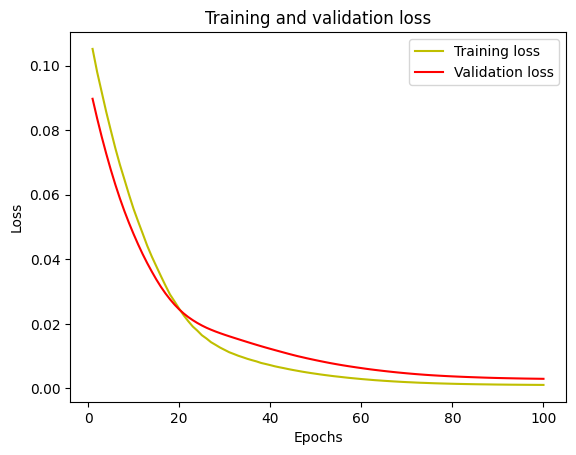

In [75]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
# Make predictions
pred_mnlr = model_mnlr.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [77]:
mnlr_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': pred_mnlr.flatten()})
mnlr_diff.head()

,Actual value,Predicted value
0,0.48,0.371121
1,0.25,0.261499
2,0.30,0.357074
3,0.25,0.272915
4,0.08,0.103080


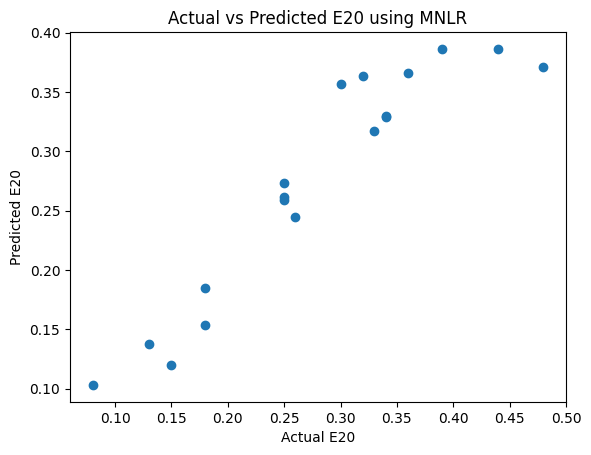

In [78]:
plt.scatter(Y_test, pred_mnlr)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using MNLR')
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_mnlr = mean_absolute_error(Y_test, pred_mnlr)

# Calculate Mean Squared Error (MSE)
mse_mnlr = mean_squared_error(Y_test, pred_mnlr)

# Calculate Root Mean Squared Error (RMSE)
rmse_mnlr = np.sqrt(mse_mnlr)

# Calculate R-squared (R2)
r2_mnlr = r2_score(Y_test, pred_mnlr)

print("Mean Absolute Error (MAE):", mae_mnlr)
print("Mean Squared Error (MSE):", mse_mnlr)
print("Root Mean Squared Error (RMSE):", rmse_mnlr)
print("R-squared (R2):", r2_mnlr)

Mean Absolute Error (MAE): 0.025469145062896947
Mean Squared Error (MSE): 0.0013072719956688224
Root Mean Squared Error (RMSE): 0.03615621655633817
R-squared (R2): 0.8813335593542996


- ## **LRNN( Layer-Recurrent Neural Network)**

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [81]:
# Define the LRNN model
model_lrnn = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),  # Additional layer
    Dense(1) 
      
])

# Compile the model
model_lrnn.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

# Train the model
history = model_lrnn.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_lrnn = model_lrnn.evaluate(x_test, Y_test)
print("Test Loss:", test_loss_lrnn)

Epoch 1/100


c:\Users\Alekhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - loss: 0.0342 - mae: 0.1357 - val_loss: 0.0315 - val_mae: 0.1385
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0288 - mae: 0.1282 - val_loss: 0.0269 - val_mae: 0.1372
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0208 - mae: 0.1113 - val_loss: 0.0243 - val_mae: 0.1391
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0160 - mae: 0.1055 - val_loss: 0.0230 - val_mae: 0.1392
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0140 - mae: 0.1033 - val_loss: 0.0222 - val_mae: 0.1371
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0139 - mae: 0.1057 - val_loss: 0.0213 - val_mae: 0.1341
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0116 - mae: 0.0959 - val_loss: 0.0197 - val_mae: 0.1279
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0103 - mae: 0.0908 - val_loss: 0.0175 - val_mae: 0.1193
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0083 - mae: 0.0794 - va

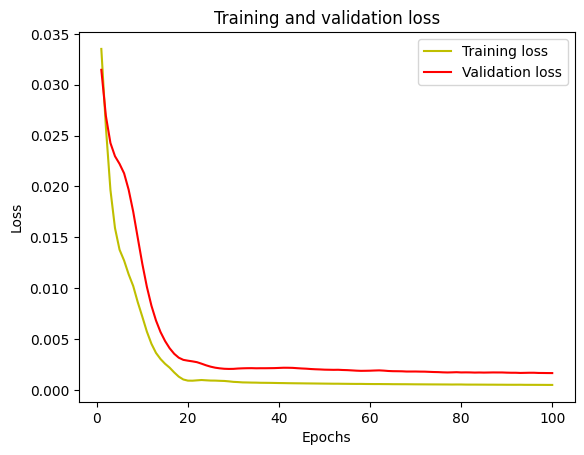

In [82]:
# Plot training and validation loss

val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
# Make predictions
pred_lrnn = model_lrnn.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [84]:
lrnn_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': pred_lrnn.flatten()})
lrnn_diff.head()

,Actual value,Predicted value
0,0.48,0.422269
1,0.25,0.270505
2,0.30,0.342610
3,0.25,0.282623
4,0.08,0.078079


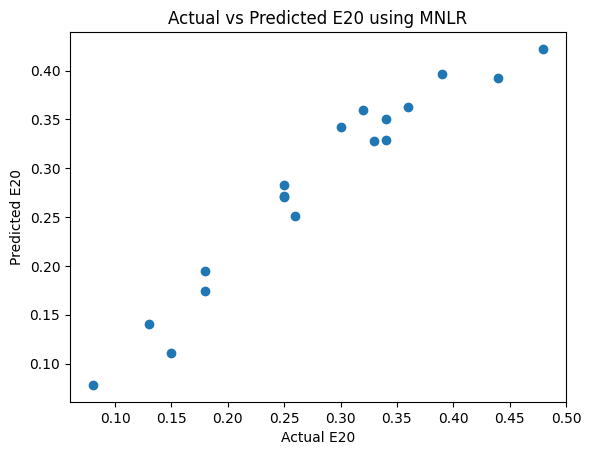

In [85]:
plt.scatter(Y_test, pred_lrnn)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using MNLR')
plt.show()

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_lrnn = mean_absolute_error(Y_test, pred_lrnn)

# Calculate Mean Squared Error (MSE)
mse_lrnn = mean_squared_error(Y_test, pred_lrnn)

# Calculate Root Mean Squared Error (RMSE)
rmse_lrnn = np.sqrt(mse_lrnn)

# Calculate R-squared (R2)
r2_lrnn = r2_score(Y_test, pred_lrnn)

print("Mean Absolute Error (MAE):", mae_lrnn)
print("Mean Squared Error (MSE):", mse_lrnn)
print("Root Mean Squared Error (RMSE):", rmse_lrnn)
print("R-squared (R2):", r2_lrnn)

Mean Absolute Error (MAE): 0.020955747498406303
Mean Squared Error (MSE): 0.000733426831912748
Root Mean Squared Error (RMSE): 0.027081854292362404
R-squared (R2): 0.9334238384165718


- ## **RRNN( Ridge Regression Neural Network)**

In [87]:
from tensorflow.keras.regularizers import l2

# Define the RRNN model with 3 hidden layers
model_rrnn = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(1, kernel_regularizer=l2(0.01))  # Output layer with one neuron for regression and L2 regularization
])


model_rrnn.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'] )

history = model_rrnn.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


test_loss_rrnn = model_rrnn.evaluate(x_test, Y_test)
print("Test Loss:", test_loss_rrnn)

Epoch 1/100


c:\Users\Alekhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - loss: 2.0145 - mae: 1.4081 - val_loss: 2.0324 - val_mae: 1.4121
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.8739 - mae: 1.3573 - val_loss: 1.9156 - val_mae: 1.3699
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.7843 - mae: 1.3239 - val_loss: 1.8034 - val_mae: 1.3281
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.7039 - mae: 1.2930 - val_loss: 1.6967 - val_mae: 1.2869
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.5772 - mae: 1.2428 - val_loss: 1.5949 - val_mae: 1.2463
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.4794 - mae: 1.2027 - val_loss: 1.4980 - val_mae: 1.2063
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.3714 - mae: 1.1566 - val_loss: 1.4046 - val_mae: 1.1666
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3030 - mae: 1.1266 - val_loss: 1.3139 - val_mae: 1.1266
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2191 - mae: 1.0874 - va

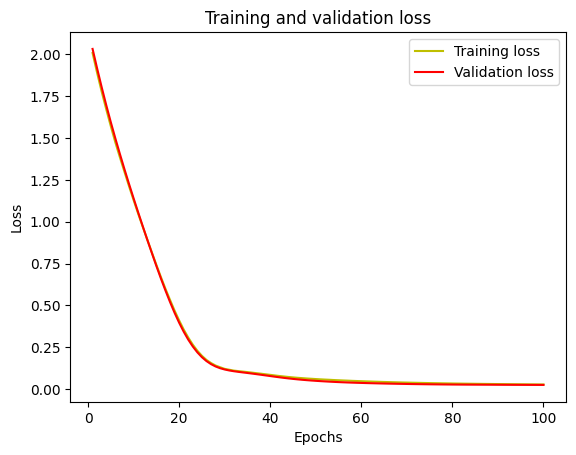

In [88]:
# Plot training and validation loss

val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
# Make predictions
pred_rrnn = model_rrnn.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


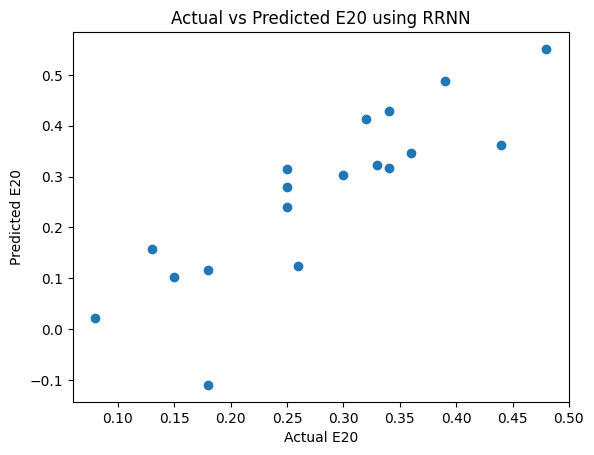

In [90]:
plt.scatter(Y_test, pred_rrnn)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using RRNN')
plt.show()

In [91]:
rrnn_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': pred_rrnn.flatten()})
rrnn_diff.head()

,Actual value,Predicted value
0,0.48,0.551000
1,0.25,0.314183
2,0.30,0.303771
3,0.25,0.239519
4,0.08,0.021622


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_rrnn = mean_absolute_error(Y_test, pred_rrnn)

# Calculate Mean Squared Error (MSE)
mse_rrnn = mean_squared_error(Y_test, pred_rrnn)

# Calculate Root Mean Squared Error (RMSE)
rmse_rrnn = np.sqrt(mse_rrnn)

# Calculate R-squared (R2)
r2_rrnn = r2_score(Y_test, pred_rrnn)

print("Mean Absolute Error (MAE):", mae_rrnn)
print("Mean Squared Error (MSE):", mse_rrnn)
print("Root Mean Squared Error (RMSE):", rmse_rrnn)
print("R-squared (R2):", r2_rrnn)

Mean Absolute Error (MAE): 0.06698158841994074
Mean Squared Error (MSE): 0.008687291074247917
Root Mean Squared Error (RMSE): 0.09320563863977284
R-squared (R2): 0.21141895944405775


- ## **Random Forest**

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
# Instantiate and fit the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(x_test)

C:\Users\Alekhya\AppData\Local\Temp\ipykernel_304\3362250075.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


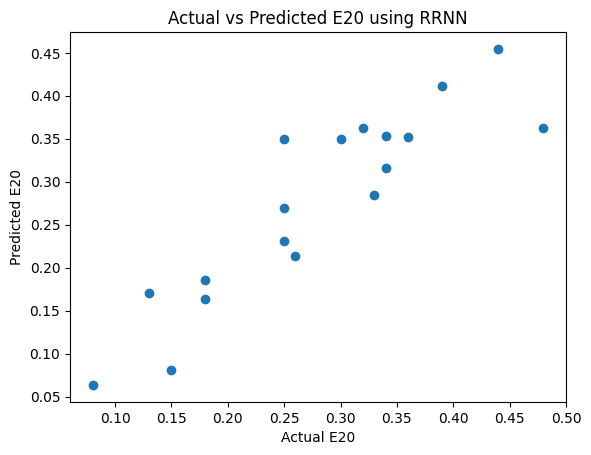

In [95]:
plt.scatter(Y_test, rf_pred)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using RRNN')
plt.show()

In [96]:
rf_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': rf_pred.flatten()})
rf_diff.head()

,Actual value,Predicted value
0,0.48,0.3625
1,0.25,0.2312
2,0.30,0.3502
3,0.25,0.2696
4,0.08,0.0635


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(Y_test, rf_pred)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(Y_test, rf_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Calculate R-squared (R2)
r2_rf = r2_score(Y_test, rf_pred)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Mean Absolute Error (MAE): 0.03729444444444442
Mean Squared Error (MSE): 0.0023138449999999962
Root Mean Squared Error (RMSE): 0.04810244276541469
R-squared (R2): 0.7899627994284597


- ## **K-Nearest Neighbour**

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
# Instantiate and fit the model
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

# Predict on the test set
knn_pred = knn_model.predict(x_test)


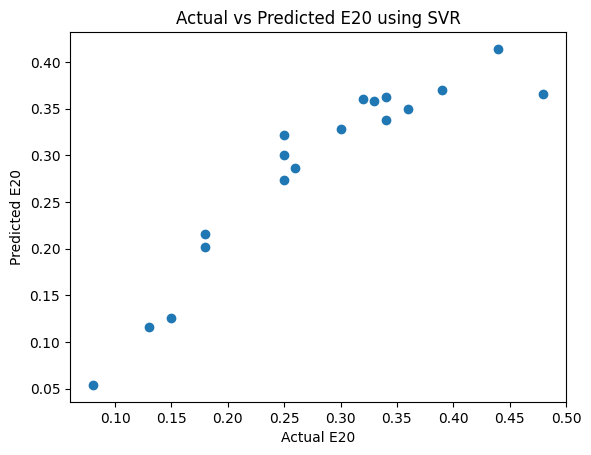

In [100]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual E20')
plt.ylabel('Predicted E20')
plt.title('Actual vs Predicted E20 using SVR')
plt.show()

In [101]:
knn_diff = pd.DataFrame({'Actual value': Y_test.values.flatten(), 'Predicted value': knn_pred.flatten()})
knn_diff.head()

,Actual value,Predicted value
0,0.48,0.366
1,0.25,0.300
2,0.30,0.328
3,0.25,0.274
4,0.08,0.054


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(Y_test, knn_pred)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(Y_test, knn_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2)
r2_knn = r2_score(Y_test, knn_pred)

print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R2):", r2_knn)

Mean Absolute Error (MAE): 0.03244444444444446
Mean Squared Error (MSE): 0.0016662222222222232
Root Mean Squared Error (RMSE): 0.040819385372911035
R-squared (R2): 0.8487501751043621


> ## **Comparing all the above Models**

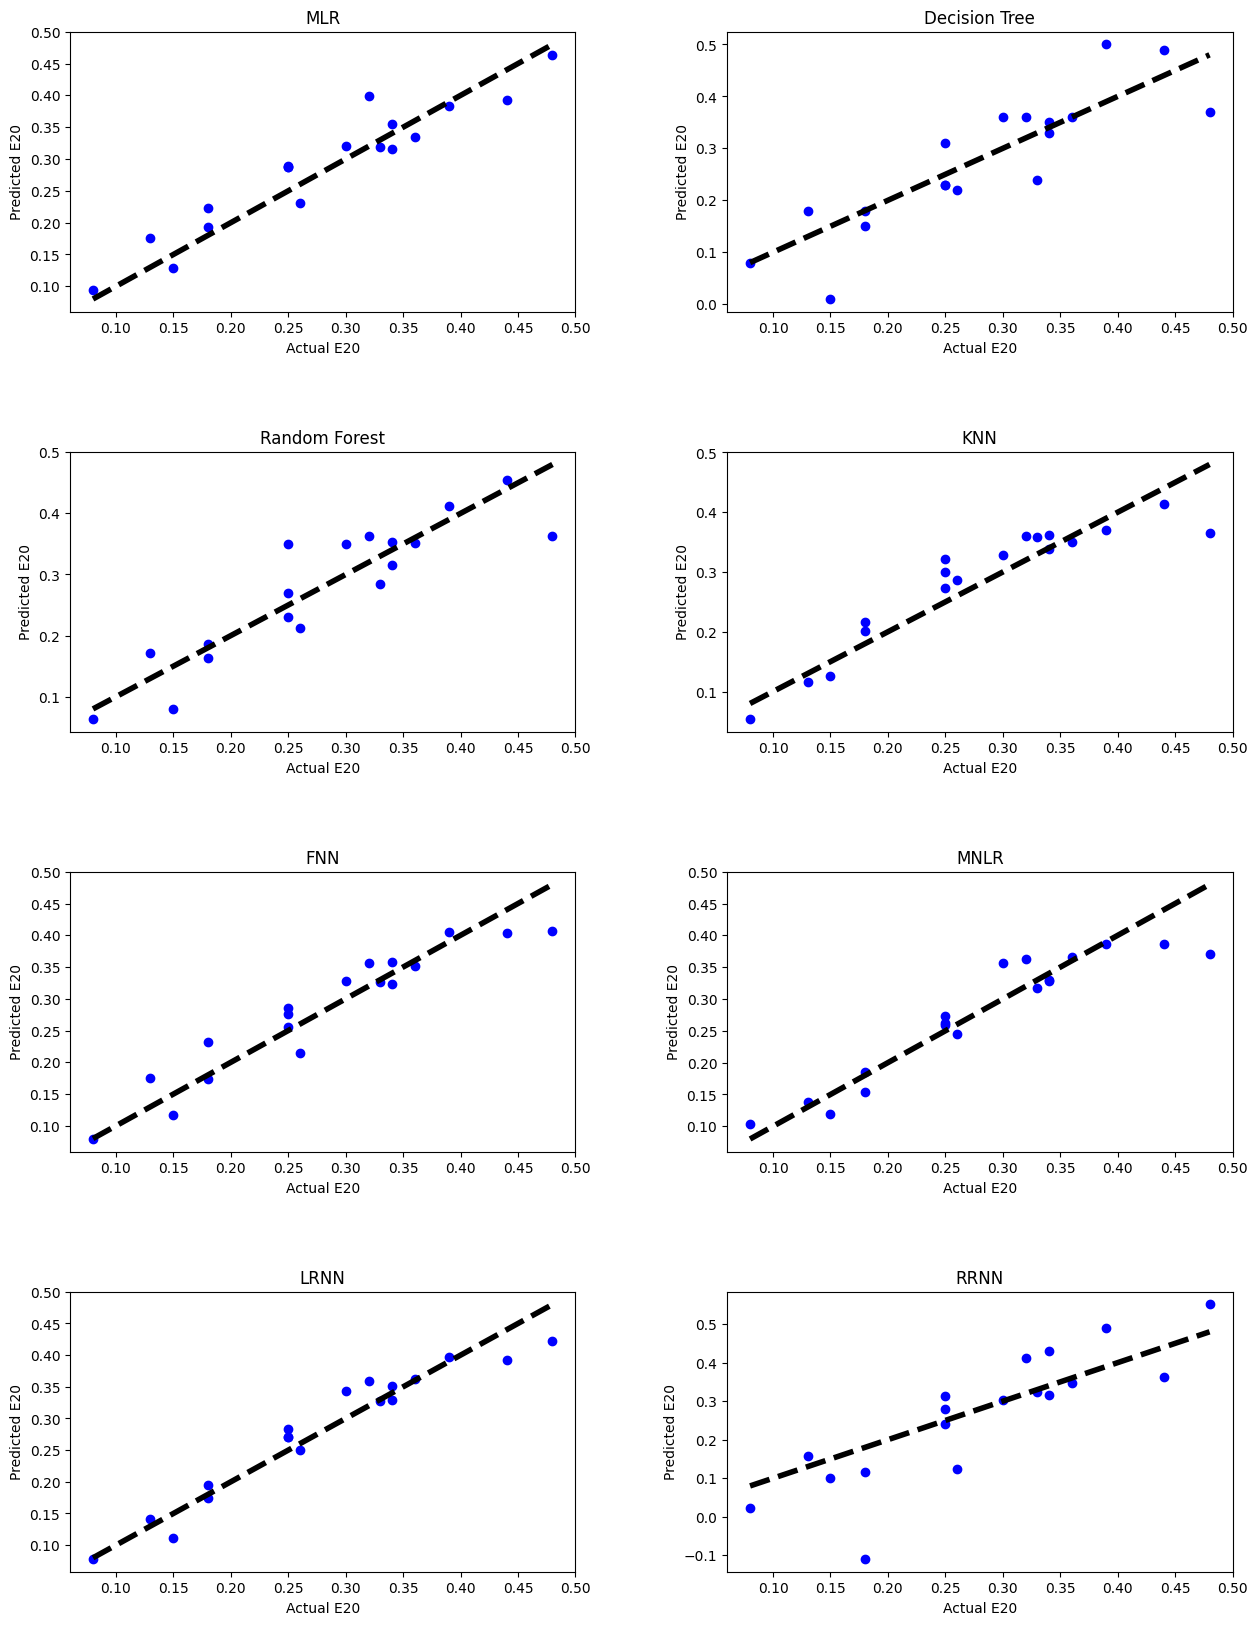

In [103]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Actual vs Predicted plots for each model
models = {
    "MLR": final_pred,
    "Decision Tree": final_pred_dt,
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "FNN": pred_fnn,
    "MNLR": pred_mnlr,
    "LRNN": pred_lrnn,
    "RRNN": pred_rrnn
}

for i, (model_name, predictions) in enumerate(models.items()):
    ax = axs[i // 2, i % 2]
    ax.scatter(Y_test, predictions, color='blue')
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    ax.set_title(model_name)
    ax.set_xlabel('Actual E20')
    ax.set_ylabel('Predicted E20')

plt.show()

In [109]:
# Dictionary to store R2 scores for each model
r2_scores = {}
rsme_scores ={}

# Calculate R2 score for each model
for model_name, predictions in models.items():
    r2 = r2_score(Y_test, predictions)
    r2_scores[model_name] = r2
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
# Print R2 scores
for model_name, r2 in sorted_r2_scores:
    print(f"{model_name}:      (R2 score = {np.round(r2,2)})")
    
print("\n")
    
for model_name, predictions in models.items():
    rsme = np.sqrt(mean_squared_error(Y_test,predictions))
    rsme_scores[model_name] = rsme
sorted_rsme = sorted(rsme_scores.items(), key=lambda x: x[1], reverse=True)
# Print R2 scores
for model_name, rsme in sorted_rsme:
    print(f"{model_name}:      (RSME = {np.round(rsme ,8)})")
    

LRNN:      (R2 score = 0.93)
FNN:      (R2 score = 0.9)
MLR:      (R2 score = 0.9)
MNLR:      (R2 score = 0.88)
KNN:      (R2 score = 0.85)
Random Forest:      (R2 score = 0.79)
Decision Tree:      (R2 score = 0.65)
RRNN:      (R2 score = 0.21)


RRNN:      (RSME = 0.09320564)
Decision Tree:      (RSME = 0.06200358)
Random Forest:      (RSME = 0.04810244)
KNN:      (RSME = 0.04081939)
MNLR:      (RSME = 0.03615622)
MLR:      (RSME = 0.0338863)
FNN:      (RSME = 0.03313892)
LRNN:      (RSME = 0.02708185)
